DATA PREPROCESSING

In [60]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Load the dataset
file_path = 'data/india_housing_prices.csv'
df = pd.read_csv(file_path)

# Display shape and head
print(f"Data Shape: {df.shape}")
df.head()

Data Shape: (250000, 23)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [128]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [129]:
# Remove duplicates if any
df = df.drop_duplicates()

# Drop the 'ID' column as it's not useful for prediction
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
    print("Dropped 'ID' column.")

print(f"New Shape: {df.shape}")

Dropped 'ID' column.
New Shape: (250000, 22)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           250000 non-null  object 
 1   City                            250000 non-null  object 
 2   Locality                        250000 non-null  object 
 3   Property_Type                   250000 non-null  object 
 4   BHK                             250000 non-null  int64  
 5   Size_in_SqFt                    250000 non-null  int64  
 6   Price_in_Lakhs                  250000 non-null  float64
 7   Price_per_SqFt                  250000 non-null  float64
 8   Year_Built                      250000 non-null  int64  
 9   Furnished_Status                250000 non-null  object 
 10  Floor_No                        250000 non-null  int64  
 11  Total_Floors                    250000 non-null  int64  
 12  Age_of_Property 

In [131]:
for col in df.columns:
    if df[col].dtype == 'object': 
        print(f"Unique values in {col}:", df[col].unique())

Unique values in State: ['Tamil Nadu' 'Maharashtra' 'Punjab' 'Rajasthan' 'West Bengal'
 'Chhattisgarh' 'Delhi' 'Jharkhand' 'Telangana' 'Karnataka'
 'Uttar Pradesh' 'Assam' 'Uttarakhand' 'Bihar' 'Gujarat' 'Haryana'
 'Andhra Pradesh' 'Madhya Pradesh' 'Kerala' 'Odisha']
Unique values in City: ['Chennai' 'Pune' 'Ludhiana' 'Jodhpur' 'Jaipur' 'Durgapur' 'Coimbatore'
 'Bilaspur' 'New Delhi' 'Ranchi' 'Warangal' 'Bangalore' 'Nagpur' 'Lucknow'
 'Silchar' 'Dehradun' 'Noida' 'Gaya' 'Jamshedpur' 'Ahmedabad' 'Hyderabad'
 'Faridabad' 'Amritsar' 'Kolkata' 'Dwarka' 'Vishakhapatnam' 'Bhopal'
 'Indore' 'Haridwar' 'Mysore' 'Patna' 'Raipur' 'Vijayawada' 'Trivandrum'
 'Kochi' 'Surat' 'Gurgaon' 'Mangalore' 'Cuttack' 'Bhubaneswar' 'Guwahati'
 'Mumbai']
Unique values in Locality: ['Locality_84' 'Locality_490' 'Locality_167' 'Locality_393' 'Locality_466'
 'Locality_246' 'Locality_254' 'Locality_232' 'Locality_122' 'Locality_75'
 'Locality_462' 'Locality_227' 'Locality_287' 'Locality_148'
 'Locality_369' 'Locali

In [134]:
df_clean.describe()

,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [133]:
df_clean = df.copy()

In [135]:
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.title()
    
logical_condition = (
    (df_clean['Price_in_Lakhs'] > 0) & 
    (df_clean['Size_in_SqFt'] > 100) &  # Minimum 100 SqFt to be a valid structure
    (df_clean['Price_per_SqFt'] > 0) &
    (df_clean['BHK'] > 0) & 
    (df_clean['Floor_No'] <= df_clean['Total_Floors']) &
    (df_clean['Floor_No'] >= 0) &        # Floor number cannot be negative
    (df_clean['Total_Floors'] > 0) &     # Building must have at least 1 floor
    ((df_clean['Size_in_SqFt'] / df_clean['BHK']) > 100) & # Check for impossible density (e.g. 5 BHK in 300 sqft)
    (df_clean['Age_of_Property'] >= 0) &
    (df_clean['City'] != '') &           # City name cannot be empty
    (df_clean['City'] != 'Nan') &        # Check for string "Nan" artifacts
    (df_clean['Property_Type'] != '') &
    (df_clean['Furnished_Status'].isin(['Furnished', 'Semi-Furnished', 'Unfurnished'])) # Basic validity check
)
df_clean = df_clean[logical_condition]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132336 entries, 2 to 249999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           132336 non-null  object 
 1   City                            132336 non-null  object 
 2   Locality                        132336 non-null  object 
 3   Property_Type                   132336 non-null  object 
 4   BHK                             132336 non-null  int64  
 5   Size_in_SqFt                    132336 non-null  int64  
 6   Price_in_Lakhs                  132336 non-null  float64
 7   Price_per_SqFt                  132336 non-null  float64
 8   Year_Built                      132336 non-null  int64  
 9   Furnished_Status                132336 non-null  object 
 10  Floor_No                        132336 non-null  int64  
 11  Total_Floors                    132336 non-null  int64  
 12  Age_of_Property      

In [137]:
def cap_outliers(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    return np.clip(series, lower_limit, upper_limit)

# Apply Capping to Price and Size
df_clean['Price_in_Lakhs'] = cap_outliers(df_clean['Price_in_Lakhs'])
df_clean['Size_in_SqFt'] = cap_outliers(df_clean['Size_in_SqFt'])
df_clean['Price_per_SqFt'] = cap_outliers(df_clean['Price_per_SqFt'])

print("Applied 1st-99th percentile capping to Price and Size.")

Applied 1st-99th percentile capping to Price and Size.


In [47]:
# Ordinal Encoding 
# Furnished: Unfurnished (0) < Semi (1) < Fully (2)
furnished_map = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}
if 'Furnished_Status' in df_clean.columns:
    df_clean['Furnished_Score'] = df_clean['Furnished_Status'].map(furnished_map)

# Transport: Low (1) < Medium (2) < High (3)
transport_map = {'Low': 1, 'Medium': 2, 'High': 3}
if 'Public_Transport_Accessibility' in df_clean.columns:
    df_clean['Transport_Score_EDA'] = df_clean['Public_Transport_Accessibility'].map(transport_map)

In [48]:
# B. Binary Encoding (Yes/No)
binary_map = {'Yes': 1, 'No': 0}
for col in ['Parking_Space', 'Security']:
    if col in df_clean.columns:
        df_clean[f'{col}_Bin'] = df_clean[col].map(binary_map)

In [49]:
# One-Hot Encoding (Nominal Variables)
# valid for: Property_Type, Facing, Owner_Type, Availability_Status
nominal_cols = ['Property_Type', 'Facing', 'Owner_Type', 'Availability_Status']
# We encode them but keep original columns for visualization later
df_encoded = pd.get_dummies(df_clean, columns=nominal_cols, prefix=nominal_cols, drop_first=False)
df_clean = pd.concat([df_clean, df_encoded[df_encoded.columns.difference(df_clean.columns)]], axis=1)

In [51]:
# Target Encoding (High Cardinality)
# City: Replace City Name with the Median Price of that City.
# This allows us to correlate "City Value" with individual property price.
city_value_map = df_clean.groupby('City')['Price_in_Lakhs'].median()
df_clean['City_Value_Score'] = df_clean['City'].map(city_value_map)

# Locality: Target Encoding with Smoothing
# Locality is critical for real estate (Micro-market value). 
# However, 'Locality_X' suggests synthetic high-cardinality data.
# We replace the name with the median price of that locality.
locality_counts = df_clean['Locality'].value_counts()
valid_localities = locality_counts[locality_counts > 5].index # Only encode localities with >5 samples to avoid overfitting

# Create the map based on training data logic
locality_value_map = df_clean[df_clean['Locality'].isin(valid_localities)].groupby('Locality')['Price_in_Lakhs'].median()

# Map and fill missing (small) localities with the City's median score as a fallback
df_clean['Locality_Value_Score'] = df_clean['Locality'].map(locality_value_map)
df_clean['Locality_Value_Score'] = df_clean['Locality_Value_Score'].fillna(df_clean['City_Value_Score'])

In [52]:
# Multi-Label Encoding (Amenities)
if 'Amenities' in df_clean.columns:
    # Count
    df_clean['Amenity_Count'] = df_clean['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
    # Specific Flags
    target_amenities = ['Pool', 'Gym', 'Clubhouse', 'Garden', 'Playground']
    for item in target_amenities:
        df_clean[f'Has_{item}'] = df_clean['Amenities'].apply(lambda x: 1 if item in str(x) else 0)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132336 entries, 2 to 249999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           132336 non-null  object 
 1   City                            132336 non-null  object 
 2   Locality                        132336 non-null  object 
 3   Property_Type                   132336 non-null  object 
 4   BHK                             132336 non-null  int64  
 5   Size_in_SqFt                    132336 non-null  int64  
 6   Price_in_Lakhs                  132336 non-null  float64
 7   Price_per_SqFt                  132336 non-null  float64
 8   Year_Built                      132336 non-null  int64  
 9   Furnished_Status                132336 non-null  object 
 10  Floor_No                        132336 non-null  int64  
 11  Total_Floors                    132336 non-null  int64  
 12  Age_of_Property      

In [139]:
df = df_clean

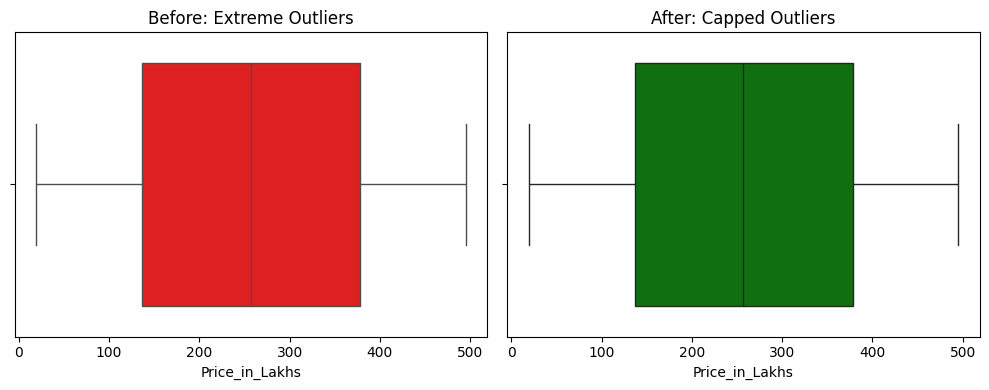

In [141]:
# Visualize the Capped Distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price_in_Lakhs'], color='red')
plt.title('Before: Extreme Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Price_in_Lakhs'], color='green')
plt.title('After: Capped Outliers')
plt.tight_layout()
plt.show()

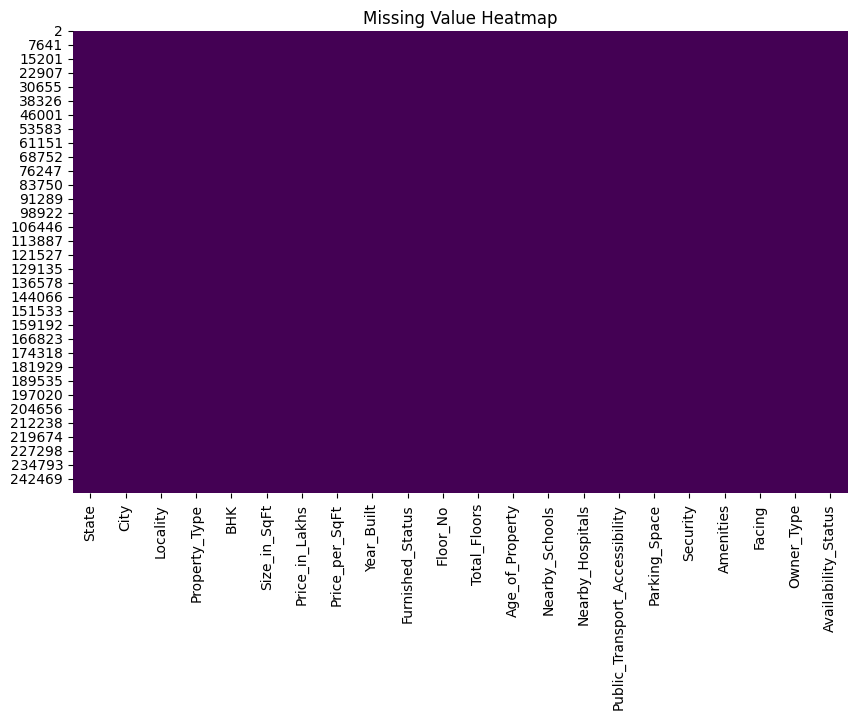

In [142]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [143]:
# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n", list(numeric_cols))
print("Categorical Columns:\n", list(categorical_cols))

# Impute Numerical with Median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Impute Categorical with Mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

# Verify cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())

Numerical Columns:
 ['BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']
Categorical Columns:
 ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

Missing values after cleaning:
0


FEATURE ENGINEERING

In [120]:
current_year = 2025

# 1. Age of Property
df['Age_of_Property'] = current_year - df['Year_Built']

# Handle edge cases (if data has future years by mistake)
df['Age_of_Property'] = df['Age_of_Property'].apply(lambda x: max(x, 0))

# 2. Recalculate Price per SqFt (Price is in Lakhs, Size in SqFt)
# Formula: (Price_Lakhs * 100,000) / Size
df['Price_per_SqFt'] = (df['Price_in_Lakhs'] * 100000) / df['Size_in_SqFt']

df[['Year_Built', 'Age_of_Property', 'Price_per_SqFt']].head()

,Year_Built,Age_of_Property,Price_per_SqFt
2,1997,28,5046.403075
3,1991,34,10955.490697
9,2011,14,13454.414932
10,1991,34,48757.894737
11,2022,3,11669.508526


In [145]:
# Map Transport Accessibility to numbers
transport_map = {'High': 3, 'Medium': 2, 'Low': 1}

# Create a temporary numeric column for transport
df['Transport_Score'] = df['Public_Transport_Accessibility'].map(transport_map)
# Fill NaN in transport score with median (just in case)
df['Transport_Score'] = df['Transport_Score'].fillna(df['Transport_Score'].median())

# Calculate Infra Score
# We give slightly more weight to Transport
df['Infra_Score'] = df['Nearby_Schools'] + df['Nearby_Hospitals'] + (df['Transport_Score'] * 2)

print("Infra Score Distribution:")
df['Infra_Score'].describe()

Infra Score Distribution:


count    132336.00000
mean         14.99199
std           4.38031
min           4.00000
25%          12.00000
50%          15.00000
75%          18.00000
max          26.00000
Name: Infra_Score, dtype: float64

In [153]:
# Calculate Median Price per SqFt for EACH City
city_medians = df.groupby('City')['Price_per_SqFt'].transform('median')

# Define Thresholds
age_threshold = 20
infra_threshold = 5

# Good Investment = 1, Bad/Average = 0
conditions = (
    (df['Price_per_SqFt'] <= city_medians + 0.05) & 
    (df['Age_of_Property'] < age_threshold) & 
    (df['Infra_Score'] > infra_threshold)
)

df['Good_Investment'] = conditions.astype(int)

# Check Class Balance
print("Investment Class Distribution:")
df['Good_Investment'].value_counts(normalize=True)

Investment Class Distribution:


Good_Investment
0    0.623315
1    0.376685
Name: proportion, dtype: float64

In [154]:
# Avg_Room_Size: "Spaciousness" Index
df_clean['Avg_Room_Size'] = df_clean['Size_in_SqFt'] / df_clean['BHK']
# Floor_Ratio: Relative height in the building
df_clean['Floor_Ratio'] = df_clean['Floor_No'] / df_clean['Total_Floors']

In [155]:
# Drop intermediate helper columns if needed (keeping Transport_Score is fine for correlation)
print("Final Columns:\n", df.columns.tolist())

Final Columns:
 ['State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status', 'Transport_Score', 'Infra_Score', 'Good_Investment', 'Avg_Room_Size', 'Floor_Ratio']


In [156]:
# Save to CSV
df.to_csv('data/processed_housing_data.csv', index=False)
print("Data saved to 'processed_housing_data.csv'")

# Preview final data
df.head()

Data saved to 'processed_housing_data.csv'


,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,...,Security,Amenities,Facing,Owner_Type,Availability_Status,Transport_Score,Infra_Score,Good_Investment,Avg_Room_Size,Floor_Ratio
2,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-Furnished,...,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_To_Move,1,19,0,1821.0,0.703704
3,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,...,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_To_Move,3,18,0,1370.5,0.807692
9,Jharkhand,Ranchi,Locality_122,Villa,2,1393,187.42,0.13,2011,Unfurnished,...,No,"Clubhouse, Playground, Garden, Gym",East,Owner,Ready_To_Move,3,12,1,696.5,0.461538
10,Telangana,Warangal,Locality_75,Independent House,1,665,324.24,0.49,1991,Semi-Furnished,...,Yes,Clubhouse,North,Broker,Under_Construction,1,11,0,665.0,0.666667
11,Karnataka,Bangalore,Locality_462,Apartment,5,3988,465.38,0.12,2022,Furnished,...,Yes,"Clubhouse, Pool, Playground, Gym",West,Broker,Ready_To_Move,3,16,1,797.6,0.250000
